![](https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/header.png)

# Titanic - Machine Learning from Disaster

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [2]:
# 1 - import libraries

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

In [3]:
# 2 - load the training and test set

train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
# 3 - consider data gaps and fill them with modal values

# print(train.isna().sum())
# print(test.isna().sum())

train = train.fillna(value=train.mode().iloc[0])
test = test.fillna(value=test.mode().iloc[0])

In [5]:
# check that gaps are filled

test.isna().sum() 

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
# 4 - leaving only certain features for learning

train = train[['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
test = test[['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare']]

In [7]:
# 5 - split the training dataset into X and y

X = train.drop(['Survived'], axis=1)
# X = train.loc[:, train.columns != 'Survived']
y = train.Survived

In [8]:
# 6 Let's do a One-Hot transformation with pandas

X = pd.get_dummies(X, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [9]:
# 7 - standardize the values in the samples

sc = StandardScaler()
train_std = sc.fit_transform(X)  # first we train
test_std = sc.transform(test)

In [10]:
# 8 - train the logistic regression model and get a prediction

warnings.filterwarnings('ignore')

clf_log_reg = LogisticRegression()
clf_log_reg.fit(train_std, y)
log_reg_prediction = clf_log_reg.predict(train_std)

# display the first 30 predict values
log_reg_prediction[:30]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0])

In [11]:
# 9 - train the K-nearest neighbors model and get a prediction

clf_KNN = KNeighborsClassifier()
clf_KNN.fit(train_std, y)
KNN_prediction = clf_KNN.predict(train_std)

# display the first 30 forecast values
KNN_prediction[:30]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0])

In [12]:
# 10 - train the decision tree model and get a prediction

clf_Decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf_Decision_tree.fit(train_std, y)
Decision_tree_prediction = clf_Decision_tree.predict(train_std)

# display the first 30 forecast values
Decision_tree_prediction[:30]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0])

In [13]:
# 11 - consider decision tree parameters

clf_Decision_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

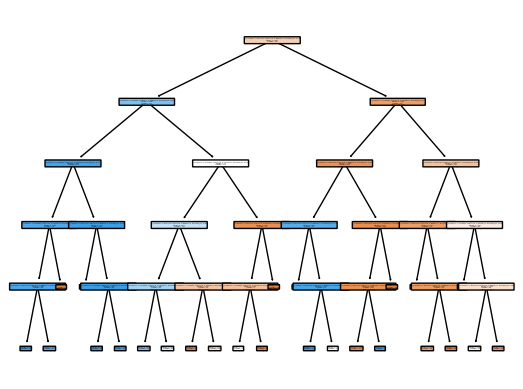

In [14]:
# 12 visualize the decision tree
plot_tree(clf_Decision_tree, feature_names=list(train_std), filled=True, rounded=True);

In [15]:
# 13 - consider the metrics for each of the classification models

print('Logistic Regression:')
print(classification_report(y, log_reg_prediction))
print('K-Nearest Neighbors')
print(classification_report(y, KNN_prediction))
print('Decision Tree')
print(classification_report(y, Decision_tree_prediction))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       549
           1       0.73      0.73      0.73       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891

K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       549
           1       0.86      0.77      0.81       342

    accuracy                           0.86       891
   macro avg       0.86      0.85      0.85       891
weighted avg       0.86      0.86      0.86       891

Decision Tree
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       549
           1       0.86      0.70      0.77       342

    accuracy                           0.84       891
   macro avg       0.85      0.82      0.83       891
weighted avg       

In [16]:
# 14 - for the final solution, I used the nearest neighbors method, since it gave me the best result
# make a prediction on test data

result = clf_KNN.predict(test_std)
result

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [17]:
# 15 - create final submit file-csv

kapturov_titanic = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': result})
kapturov_titanic.to_csv('kapturov_titanic.csv', index=False)

![](https://media.istockphoto.com/id/1177487379/vector/cute-yellow-3d-smiley-face-with-thank-you-quote.jpg?s=612x612&w=0&k=20&c=KxT1Hra-B9vdSstbi4xJ2B-F5je9LfZGU_OO26tR2j0=)